# Sentiment Analysis

YouTube Tutorial: [Python Sentiment Analysis](https://www.youtube.com/watch?v=QpzMWQvxXWk)

In [2]:
# Kaggle Comment:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: 
# https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import os

# Set plots default style
plt.style.use('ggplot')

In [3]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all 
# files under the input directory

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# You can write up to 20GB to the current directory (/kaggle/working/) that gets 
# preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved 
# outside of the current session        

/kaggle/input/sentiment-analysis-sample-csv/Reviews_10K_Sample.csv


In [4]:
# Import Dataset
dfReviewsV1 = pd.read_csv("../input/sentiment-analysis-sample-csv/Reviews_10K_Sample.csv",
                          index_col='Id')

dfReviewsV1.drop(columns='Unnamed: 0',inplace=True)

dfReviewsV1.sample(8)

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
Id,,,,,,,,,
223301,B002QGK2V8,A2RI6TLZ3IEOOR,KDI,0,0,2,1306972800,What is that Burning Rubber smell?,When brewing these Kahlua K-cups it seriously ...
305094,B001RJ7CNG,A2GNRGAEZQ4V7J,"J. Chinna-reddy ""Jeev""",1,2,5,1324684800,Satisifed buyer.,The dried apricots seemed to be fresh and have...
11161,B00213ERI0,A2Y0R9C4VVWK2O,annex13,0,0,5,1323388800,Best GFCF cookies!,These are the best GFCF cookies ever! Even bet...
479315,B0007SNZBG,AY7EDPH6SKZ05,Sue,0,0,5,1345680000,Hunts Meatloaf Sauce,Hunts Meatloaf sauce is by far THE BEST. I am...
255753,B001VNEBSC,APGPJRZMLHXGQ,Wini the Pooh,13,13,5,1297900800,DELICIOUS!!!!!,This is the brand that Pampered Chef sells for...
260933,B000QKWDRW,A34DLJ1GCG3H1S,"trying2getby ""trying2getby""",1,1,1,1318550400,Awful,I was not able to eat all of these little frui...
383319,B000UWFZA8,APMT63OXQ4AYM,"Mme. Defarge ""sisterwendi""",0,0,1,1232236800,can't stomach this one,I bought these by mistake at the grocery store...
87744,B000EVT042,A3G8Q69UMWQN50,"The one and only ""Chris""",0,0,5,1322179200,Haribo!!,These are the absolute best gummy bears! Amazo...


In [5]:
# Validate data has been imported correctly into the Dataframe
print(dfReviewsV1.shape)

(10000, 9)


## EDA

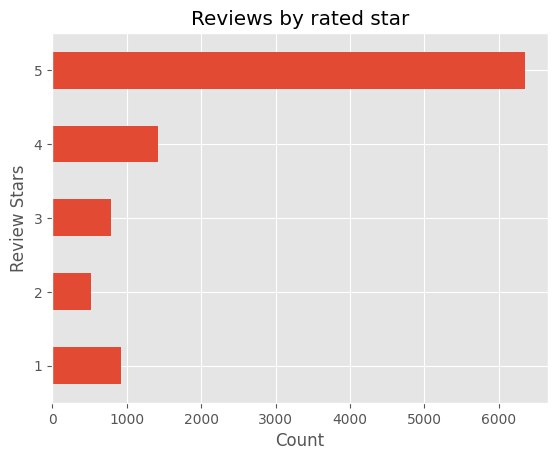

In [6]:
# Plot the frequencies of star ratings
# Line continuation is '\', no space allowed after the backslash
ax = dfReviewsV1['Score'].value_counts().sort_index() \
                    .plot(kind='barh',
                          title='Reviews by rated star')
ax.set_ylabel('Review Stars')
ax.set_xlabel('Count')

plt.show()

### Considerations 

The most reviews is '5' and then shrinks heavily from '4' to '2', but increases a bit on the '1 star'. This is a heavy bias to the right.

## Basic NLTK Analysis

Pick out a quick example and test some NLTK basic functions.

[NLTK: What is NLTK (EDUCBA)](https://www.educba.com/nltk/)
Scroll down to bottom of page for tutorials.

In [7]:
strExample = dfReviewsV1['Text'][127998]

print(strExample)

This is a good mustard but a horrible seller.  Box arrived with 8 out of 32 mustard molded or unusable.  Who knows how this was stored, but I am throwing away the box.  Amazon appears to take no responsibility for selling faulty merchandise.


In [8]:
# Splits the sentece in words
lstTokens = nltk.word_tokenize(strExample)

lstTokens

['This',
 'is',
 'a',
 'good',
 'mustard',
 'but',
 'a',
 'horrible',
 'seller',
 '.',
 'Box',
 'arrived',
 'with',
 '8',
 'out',
 'of',
 '32',
 'mustard',
 'molded',
 'or',
 'unusable',
 '.',
 'Who',
 'knows',
 'how',
 'this',
 'was',
 'stored',
 ',',
 'but',
 'I',
 'am',
 'throwing',
 'away',
 'the',
 'box',
 '.',
 'Amazon',
 'appears',
 'to',
 'take',
 'no',
 'responsibility',
 'for',
 'selling',
 'faulty',
 'merchandise',
 '.']

### NLTK POS Tag Function

This function delivers a type of classification in a form of as 'descriptor'. The *descriptor* is a ‘tag,’ representing one of the components of speech and semantic information. When it comes to Part-of-Speech (POS) tagging, on the other hand, it can be defined as the process of turning a sentence written as a list of words into a list of tuples. The tuples, in this case, have the word tag form. POS tagging can alternatively be defined as the process of associating a given the word with a part of speech.

In [9]:
# Parts of speech analysis
# Requires to import the tagger dictionary if notebook is ran in a local machine
# nltk.download('averaged_perceptron_tagger')

lstPOStagged = nltk.pos_tag(lstTokens)

lstPOStagged

[('This', 'DT'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('good', 'JJ'),
 ('mustard', 'NN'),
 ('but', 'CC'),
 ('a', 'DT'),
 ('horrible', 'JJ'),
 ('seller', 'NN'),
 ('.', '.'),
 ('Box', 'NNP'),
 ('arrived', 'VBD'),
 ('with', 'IN'),
 ('8', 'CD'),
 ('out', 'IN'),
 ('of', 'IN'),
 ('32', 'CD'),
 ('mustard', 'NN'),
 ('molded', 'VBD'),
 ('or', 'CC'),
 ('unusable', 'JJ'),
 ('.', '.'),
 ('Who', 'WP'),
 ('knows', 'VBZ'),
 ('how', 'WRB'),
 ('this', 'DT'),
 ('was', 'VBD'),
 ('stored', 'VBN'),
 (',', ','),
 ('but', 'CC'),
 ('I', 'PRP'),
 ('am', 'VBP'),
 ('throwing', 'VBG'),
 ('away', 'RP'),
 ('the', 'DT'),
 ('box', 'NN'),
 ('.', '.'),
 ('Amazon', 'NNP'),
 ('appears', 'VBZ'),
 ('to', 'TO'),
 ('take', 'VB'),
 ('no', 'DT'),
 ('responsibility', 'NN'),
 ('for', 'IN'),
 ('selling', 'VBG'),
 ('faulty', 'JJ'),
 ('merchandise', 'NN'),
 ('.', '.')]

The meaning of the tags can be found here: [NLTK POS Tag List](https://www.educba.com/nltk-pos-tag/)

### NLTK Chunk Entity Tokens

This function chunks the given list of tagged tokens.

In [10]:
# Download the chunk entity and words dictionary if notebook is ran in a local machine
# nltk.download('maxent_ne_chunker')
# nltk.download('words')

lstChunkEntity = nltk.chunk.ne_chunk(lstPOStagged)

# Print the list in a nice form.
lstChunkEntity.pprint()

(S
  This/DT
  is/VBZ
  a/DT
  good/JJ
  mustard/NN
  but/CC
  a/DT
  horrible/JJ
  seller/NN
  ./.
  (PERSON Box/NNP)
  arrived/VBD
  with/IN
  8/CD
  out/IN
  of/IN
  32/CD
  mustard/NN
  molded/VBD
  or/CC
  unusable/JJ
  ./.
  Who/WP
  knows/VBZ
  how/WRB
  this/DT
  was/VBD
  stored/VBN
  ,/,
  but/CC
  I/PRP
  am/VBP
  throwing/VBG
  away/RP
  the/DT
  box/NN
  ./.
  (PERSON Amazon/NNP)
  appears/VBZ
  to/TO
  take/VB
  no/DT
  responsibility/NN
  for/IN
  selling/VBG
  faulty/JJ
  merchandise/NN
  ./.)


## Sentiment Analysis

### VADER Sentiment Analysis

Will use NLTK's `SentimentIntensityAnalyzer` to get the negative, neutral, positive scores of a given text from VADER package. VADER stands for *Valence Aware Dictionary and sEntiment Reasoner*. This package uses the *bag of words* approach, 
1. Stop words are removed
2. Each word is scored and combined to a total score

This approach doesn't account for words relationship which in some contexts can affect the sentiment analysis, since the relaship between words is an important indicator of a sentiment in human speech. 

In [11]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

# VADER lexicon dictionary is required if notebook is ran in a local machine
# nltk.download('vader_lexicon')

siaMySentimentAnalyzer = SentimentIntensityAnalyzer()

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


Some sentiment analysis on test sentences

In [12]:
# Sentiment analysis text on a given positve sentence
siaMySentimentAnalyzer.polarity_scores('This library looks promising!')

{'neg': 0.0, 'neu': 0.501, 'pos': 0.499, 'compound': 0.4574}

In [13]:
# Sentiment analysis text on a given negative sentence
siaMySentimentAnalyzer.polarity_scores('This sentiment dictinary is awful!')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.5093}

In [14]:
# Sentiment analysis text on a feedback comment
siaMySentimentAnalyzer.polarity_scores(strExample)

{'neg': 0.216, 'neu': 0.701, 'pos': 0.082, 'compound': -0.8176}

### Roberta Pretrained Model

* Use a model trained of a large corpus of data.
Transformer mod